# Youtube_Sentiment_Analysis :  Jake Paul vs. Mike Tyson Trailer

It involves data processing methods to classify sentiments and extract actionable insights using libraries like pandas, numpy, and nltk.

# **Introduction**

Imagine you are a data scientist working for a company that has a collection of **comments of Jake Paul vs. Mike Tyson Trailer.** Your task is to analyze the sentiment

# **Objectives**



* Use Python to group texts into three sentiments: positive, negative, or neutral.
* Produce different visualizations (bar charts, word clouds) with different results related to the sentiments.

# **What is Sentiment Analysis?**

**Sentiment analysis, or opinion mining,** is the process of analyzing large volumes of text to determine whether it expresses a positive sentiment, a negative sentiment or a neutral sentiment.

Companies now have access to more data about their customers than ever before, presenting both an opportunity and a challenge:
analyzing the vast amounts of textual data available and extracting meaningful insights to guide their business decisions.

 Sentiment analysis systems help companies better understand their customers, deliver stronger customer experiences and improve their brand reputation.

# **Setup**

we will be using the following libraries:

**pandas** : for managing the data.

**numpy** : for mathematical operations.

**seaborn** : for visualizing the data.

**matplotlib** : for visualizing the data.

**nltk** :  for text preprocessing tasks

**wordcloud** : for generating word clouds.

# Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# **Load the DataSet**

This dataset is the Analysis for Jake Paul vs. Mike Tyson Trailer taken from Kaggle.

In [7]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/-H0BcPr512mhbTDDfkcTJA/comments-with-emotions.csv')

In [8]:
print(df)

                                                comment  like_count  \
0     If this fight were real and not just an exhibi...           0   
1     Tyson will bust his hide. People forget with h...           0   
2        We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥           0   
3     Watching cm punk fight in the ufc is better th...           0   
4     Yall forget how much Ring IQ this guy has. AND...           0   
...                                                 ...         ...   
1151                                                WTF           0   
1152                            Is this real or a joke?          42   
1153                                               Bruh           0   
1154                                    First comment 😂           0   
1155  Maa kasam jisne like subscribe na kiya wo exam...           1   

              published_at                       author sentiment  \
0     2024-10-26T01:19:27Z               @thesecond4113  Positive   
1     202

In [ ]:
print(df.head(5)) # check if data successfully loaded

In [ ]:
print(df.info) #know basic info of data

<bound method DataFrame.info of                                                 comment  like_count sentiment  \
0     If this fight were real and not just an exhibi...           0  Positive   
1     Tyson will bust his hide. People forget with h...           0   Neutral   
2        We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥           0   Neutral   
3     Watching cm punk fight in the ufc is better th...           0  Positive   
4     Yall forget how much Ring IQ this guy has. AND...           0  Positive   
...                                                 ...         ...       ...   
1151                                                WTF           0  Negative   
1152                            Is this real or a joke?          42  Positive   
1153                                               Bruh           0   Neutral   
1154                                    First comment 😂           0  Positive   
1155  Maa kasam jisne like subscribe na kiya wo exam...           1  Negative

In [ ]:
print(df.dtypes) #check datatype of columns

comment            object
like_count          int64
sentiment          object
emotions           object
anger             float64
fear              float64
negative          float64
positive          float64
trust             float64
anticipation      float64
joy               float64
surprise          float64
sadness           float64
disgust           float64
positive_count      int64
dtype: object


# **File Structure and Column Descriptions**
- **comment**: Text content of the comment posted on YouTube.
- **like_count**: Number of likes each comment received, indicating engagement.
- **sentiment**: Sentiment classification of each comment (Positive, Neutral, or Negative).
- **emotions**: Emotions detected in each comment, including categories like Joy, Anger, Trust, Fear, etc.
- **anger**: Numeric value representing the intensity of Anger detected in the comment.
- **fear**: Numeric value representing the intensity of Fear detected.
- **negative**: Numeric value for the overall Negative emotion detected in the comment.
- **positive**: Numeric value for the overall Positive emotion detected.
- **trust**: Numeric value representing the intensity of Trust detected.
- **anticipation**: Numeric value for the intensity of Anticipation detected in the comment.
- **joy**: Numeric value representing the intensity of Joy detected.
- **surprise**: Numeric value representing the intensity of Surprise detected.
- **sadness**: Numeric value representing the intensity of Sadness detected.
- **disgust**: Numeric value representing the intensity of Disgust detected.

# **Data Preprocessing**
1. Remove any duplicates
2. Remove any missing values
3. Remove columns that are not needed: published_at, author

In [4]:
# Remove Duplicates
df = df.drop_duplicates()

# Remove Misiing Values
df =df.dropna()

# Remove Unnecessary Columns
df = df.drop(columns=['published_at','author'])


# Data Processing

## **Word Cloud for comment column**
A word cloud is a visual representation of text data.

It displays a list of words, the importance of each being shown with font size or color.

This format is useful for quickly perceiving the most prominent terms.

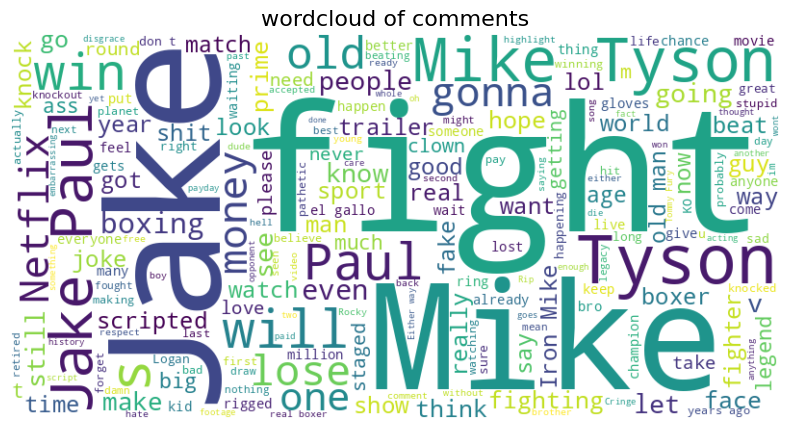

In [9]:
from wordcloud import wordcloud
import matplotlib.pyplot as plt

# WordCloud for 'comment' column
text = " ".join (comment for comment in df['comment'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('wordcloud of comments', fontsize=16)
plt.show()


# Distribution of Sentiment

**What is a Distribution Plot?**

A distribution plot is a form of data visualization that shows the distribution of a dataset.

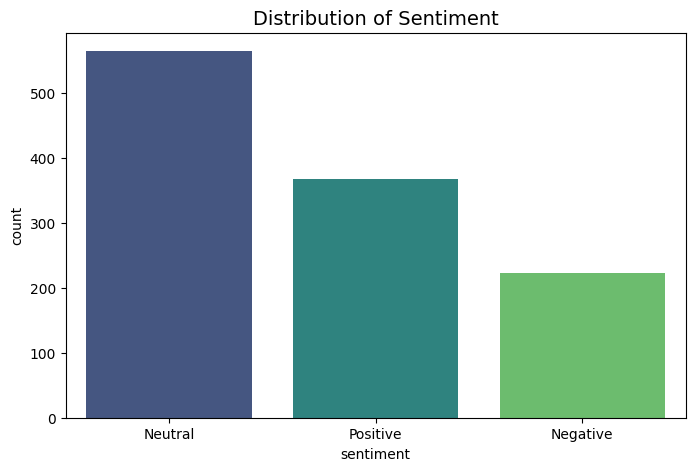

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')
plt.title('Distribution of Sentiment', fontsize=14)
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

# Correlation Heatmap for Emotions
**What is a Correlation Heatmap?**

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.

It is very important in feature selection and helps us to understand the relationships between different features in a dataset.

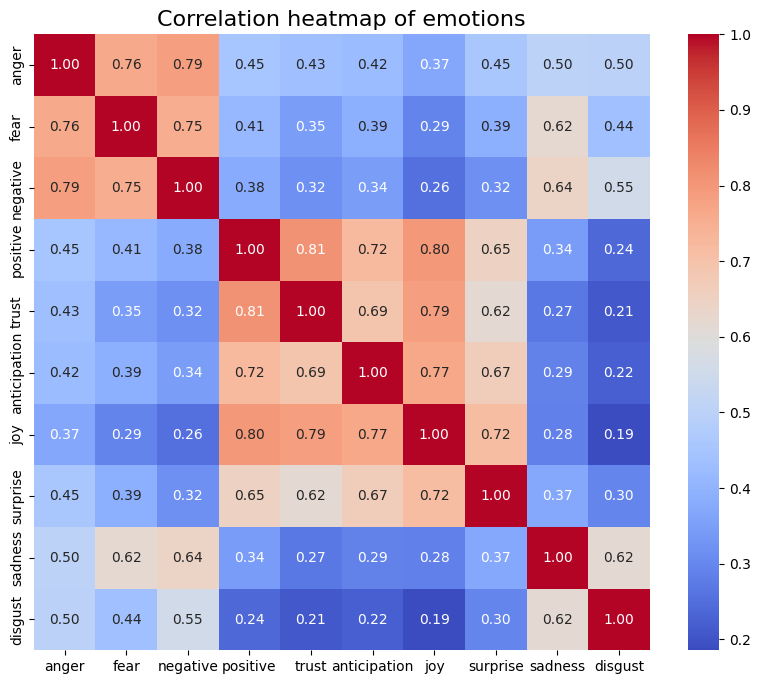

In [10]:
import seaborn as sns

emotions = ['anger', 'fear', 'negative', 'positive', 'trust',
                   'anticipation', 'joy', 'surprise', 'sadness', 'disgust']
correlation_matrix = df[emotions].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.2f', square=True)
plt.title('Correlation heatmap of emotions', fontsize=16)
plt.show()

**insights from the Heatmap:**

• The diagonal values are all 1, as each variable is perfectly correlated with itself.

**• Strong correlations (close to 1):**

• anger and negative (0.79): Strong positive correlation between anger and negativity.

• positive and trust (0.81): Strong relationship between positivity and trust.

• joy and positive (0.80): High positivity is often associated with joy.

**• Weaker correlations (close to 0):**

• sadness and joy (0.28): Indicates that sadness and joy are only weakly related.

• disgust and joy (0.19): Low correlation, showing little interaction between these emotions.

# Barplot of Top Emotions
**What is a Barplot?**

A barplot is a way of representing data where the length of the bars represents the magnitude of the variable.

It is useful for comparing different categories of data.

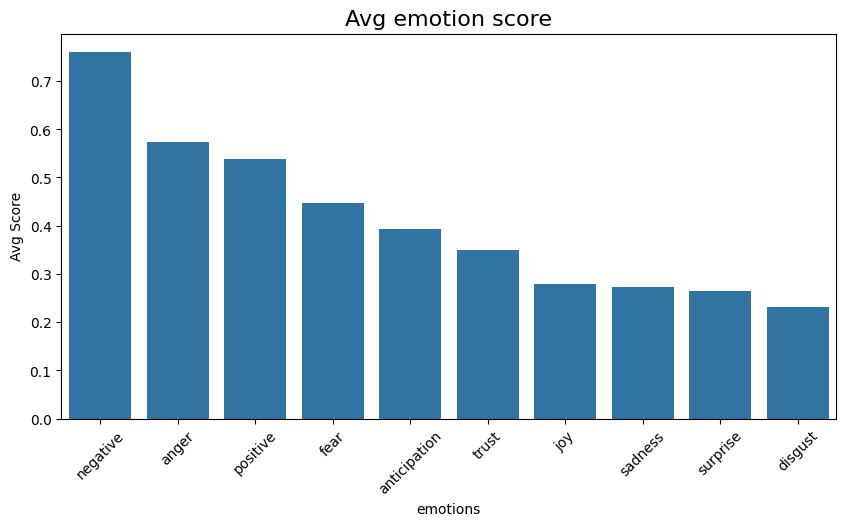

In [ ]:
# Barplot of top emotions
mean_emotions = df[emotions].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x= mean_emotions.index, y=mean_emotions.values)

plt.title('Avg emotion score', fontsize=16)
plt.xlabel('emotions')
plt.ylabel('Avg Score')
plt.xticks(rotation=45)
plt.show()


# Top 10 most common words in comments

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


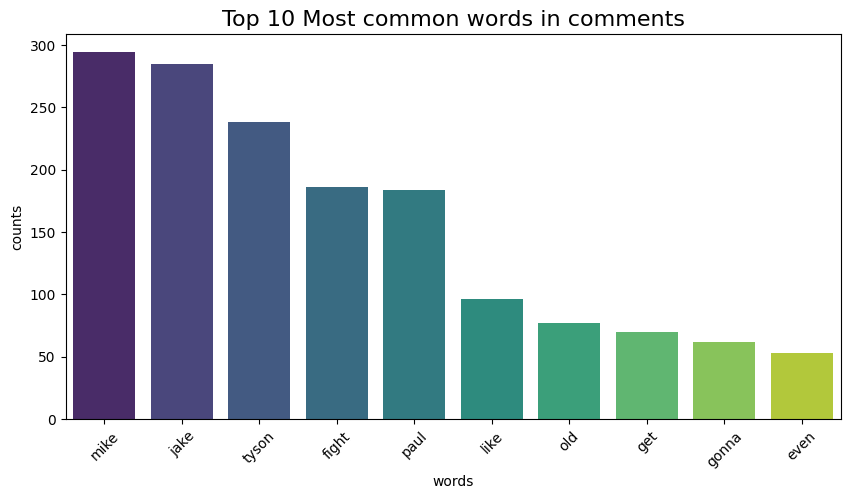

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = " ".join(df['comment'].astype(str)).split()
filtered_words = [word.lower() for word in all_words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')

plt.title('Top 10 Most common words in comments', fontsize=16)
plt.xlabel('words')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()


# Pairplot for selected emotion columns
**What is a Pairplot?**

A pairplot is a plot where the pairplot() function in seaborn plots a grid of pairwise relationships in a dataset.

The pairplot function creates a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column.

That creates a matrix of subplots.

* The diagonal shows the distribution of each emotion score as a kernel density estimation (KDE).

* Positive and negative scores have wider distributions compared to others, indicating higher variability.

* Sadness and anger are concentrated near lower values, suggesting that these emotions are less frequently intense in the dataset.

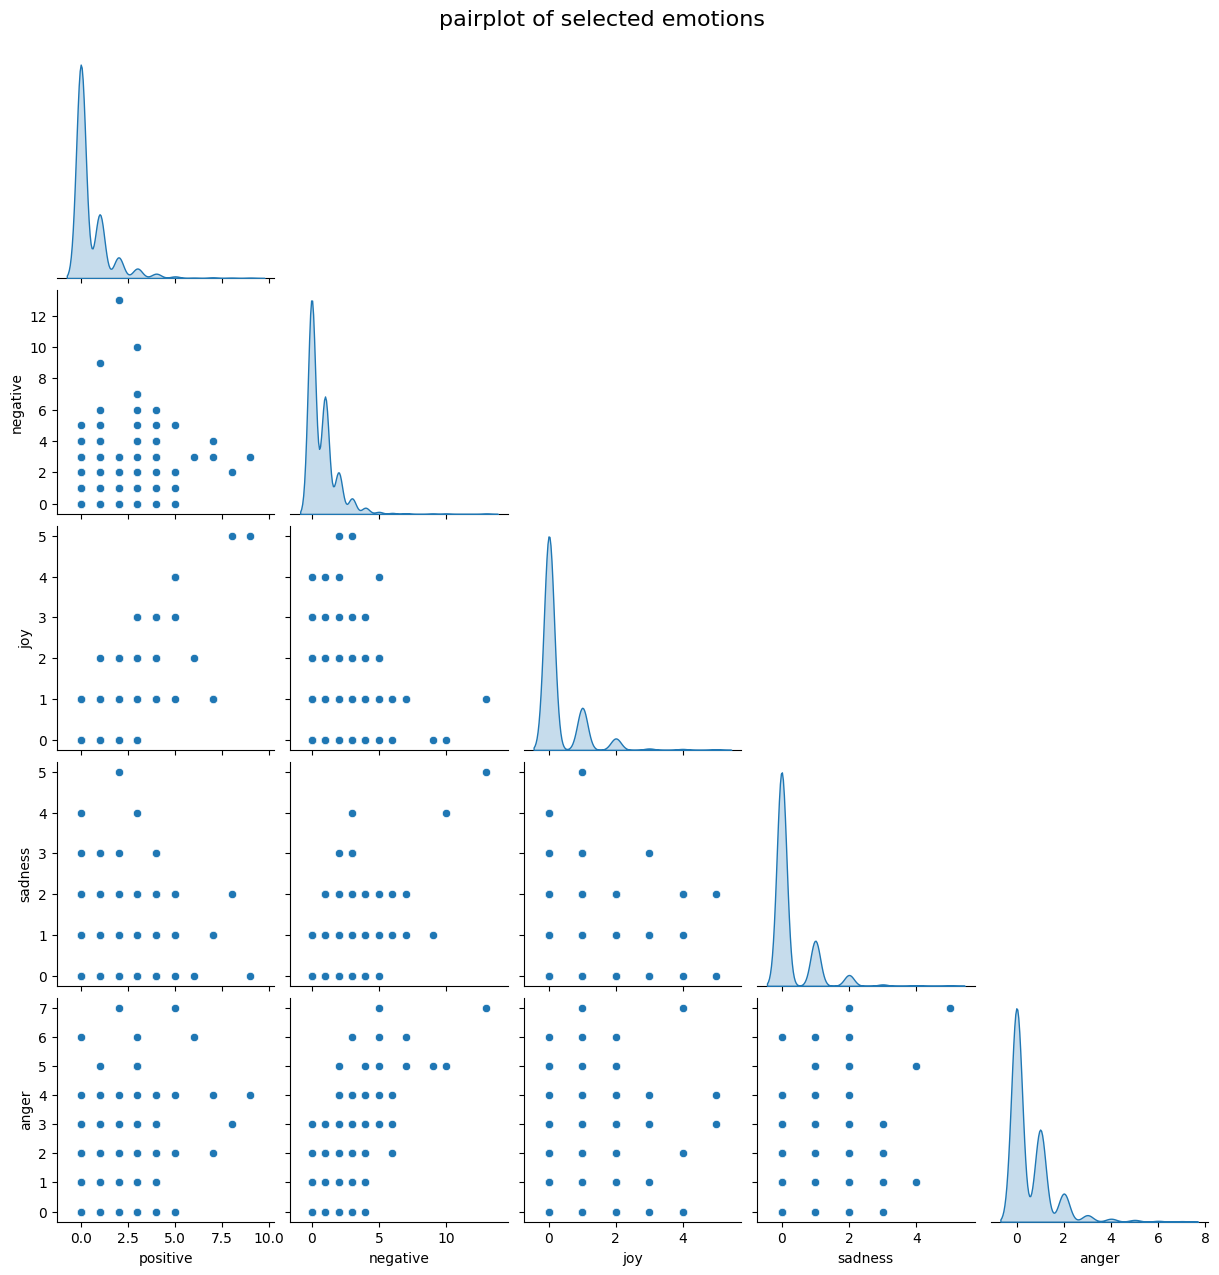

In [18]:
# Pairplot for selected emotion columns
selected_emotion = ['positive', 'negative', 'joy', 'sadness', 'anger']

sns.pairplot(df[selected_emotion], diag_kind='kde', corner=True)
plt.suptitle('pairplot of selected emotions', y=1.02, fontsize=16)
plt.show()

# Average likes by sentiment

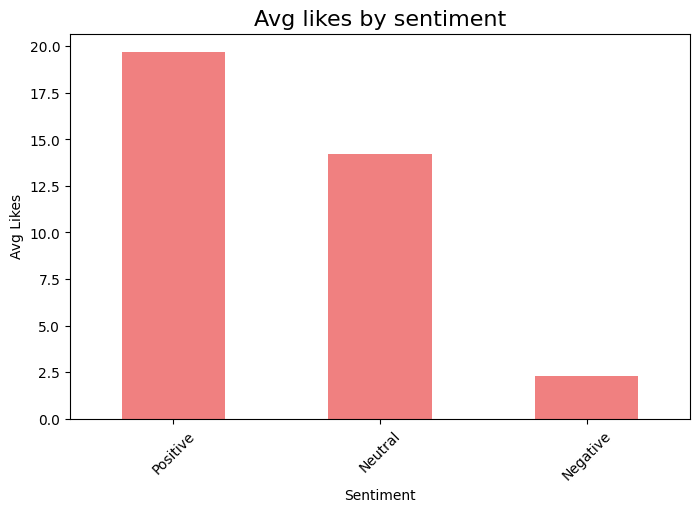

In [29]:
avg_likes = df.groupby('sentiment')['like_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
avg_likes.plot(kind='bar', color='lightcoral')

plt.title('Avg likes by sentiment', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Avg Likes')
plt.xticks(rotation=45)
plt.show()

# Top 5 Positive Emotion Comments

In [32]:
pd.set_option('display.max_colwidth', None)

# Comments with highest positive emotion scores
top_positive_comments = df.sort_values(by='positive', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'positive']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        comment  \
57                                                        I think you past your prime and are foolish enough to think the internet cares about your extremist mindset on a boxing match forgetting that the entertainment world is all about entertainment and engagement. You do the engaging and we will watch it for the entertainment . Tysons a full grown man who makes his own

# Top 5 Negative Emotion Comments

In [33]:
# Comments with highest -ve emotion scores
top_negative_comments = df.sort_values(by='negative', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_negative_comments[['comment', 'negative']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  comment  \
280  Mr Tyson  no disrespect bro , please , PLEASE withdraw from this fight with the young hungry heavyweight prospect & future Undisputed World Champion ,"The 1:24  Problem Child" Jake Paul (10-1- 0  7 KO) ,  1st dan black belt Uechi Ryu Karate Do  🥋🇯🇵  .\n\nOnce again Mr Tyson , please PLEASE withdraw from this dangerous fight as you will be hurt & we fear for your health & safety .\n\n\nFriend of Grandmaster Steven Segal Sensei : 11th dan black belt 🥋 

# Insights
*   **Sentiment is Skewed:** A large portion of comments are negative, indicating significant initial dissatisfaction with the trailer.
    *   **Example:** If 60% are negative, trailer reception was poor.
    *   **Implementation:** Reassess marketing strategy; address specific negative feedback in future communications.

*   **Negative Themes Dominant:** Common words highlight negative aspects like disappointment and criticism.
    *   **Example:** Words like "boring" are frequent.
    *   **Implementation:** Create new content emphasizing exciting aspects to counter negative perceptions.

*   **Anger and Negativity Linked:** Strong correlation means angry comments are highly likely to be negative.
    *   **Example:** High anger scores align with negative classifications.
    *   **Implementation:** Train teams to identify and address angry comments quickly for de-escalation.

*   **Disgust Less Prevalent:** Average disgust score is low, suggesting it's not a major concern.
    *   **Example:** Average disgust is lower than other emotions.
    *   **Implementation:** Focus resources on emotions with higher intensity; less need to prioritize addressing disgust specifically.

*   **Negative Comments Gain Traction:** Negative comments receive the most likes on average.
    *   **Example:** Negative comments have highest average like counts.
    *   **Implementation:** Investigate why negative comments resonate; engage with popular negative feedback or use insights to improve.

*   **Positive Highlights:** Top positive comments show excitement for specific aspects (e.g., Mike Tyson).
    *   **Example:** Comments like "Excited for Mike Tyson!"
    *   **Implementation:** Feature these popular positive points heavily in future marketing.

*   **Varied Positive Intensity:** Positive sentiment shows a wider range of expression than sadness.
    *   **Example:** Positive scores have a broader distribution.
    *   **Implementation:** Segment positive feedback to understand different levels of enthusiasm and their drivers.